In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
SAMPLE = False

In [2]:
df_all = None
for root, dirs, files in os.walk('results'):
    for dir in dirs:
        relative_path = os.path.relpath(os.path.join(root, dir), 'results')
        if len(relative_path.split(os.sep)) == 1:
            path = os.path.join(root, dir, 'results.csv')
            df = pd.read_csv(path)
            df['model'] = dir
            if df_all is None:
                df_all = df
            else:
                df_all = pd.concat([df_all, df], ignore_index=True)

df_all         

,task,score,model,method
0,2wikimqa,37.24,llama-3-8B-Instruct,baseline
1,dureader,16.73,llama-3-8B-Instruct,baseline
2,gov_report,17.80,llama-3-8B-Instruct,baseline
3,hotpotqa,46.10,llama-3-8B-Instruct,baseline
4,lcc,56.85,llama-3-8B-Instruct,baseline
...,...,...,...,...
1915,repobench-p,48.13,Qwen2-7B-Instruct,PartialLogQuant_2_256
1916,samsum,27.46,Qwen2-7B-Instruct,PartialLogQuant_2_256
1917,trec,70.00,Qwen2-7B-Instruct,PartialLogQuant_2_256
1918,triviaqa,83.96,Qwen2-7B-Instruct,PartialLogQuant_2_256


In [3]:
tasks = df_all['task'].unique()
tasks

array(['2wikimqa', 'dureader', 'gov_report', 'hotpotqa', 'lcc', 'lsht',
       'multifieldqa_en', 'multifieldqa_zh', 'multi_news', 'musique',
       'narrativeqa', 'passage_count', 'passage_retrieval_en',
       'passage_retrieval_zh', 'qasper', 'qmsum', 'repobench-p', 'samsum',
       'trec', 'triviaqa', 'vcsum'], dtype=object)

In [4]:
task_map = {}
for i, task in enumerate(tasks):
    print(i, task)
    task_map[task] = input('Enter task name: ')
    

0 2wikimqa
1 dureader
2 gov_report
3 hotpotqa
4 lcc
5 lsht
6 multifieldqa_en
7 multifieldqa_zh
8 multi_news
9 musique
10 narrativeqa
11 passage_count
12 passage_retrieval_en
13 passage_retrieval_zh
14 qasper
15 qmsum
16 repobench-p
17 samsum
18 trec
19 triviaqa
20 vcsum


In [2]:
df_all = pd.read_csv('results.csv')

In [3]:
df_all.to_csv('results.csv', index=False)

In [10]:
'''\multirow{6}{*}{Qwen1.5-14B-Chat-AWQ} 
& Math             & 70.28 & 59.82 & 63.31 & \textbf{65.50} \\
& Code Completion  & 57.47  & 37.48  & 49.37  & \textbf{50.44}  \\
& Few-shot Learning  & 59.02  & 57.50  & \textbf{58.25}  & 58.22  \\ 
& Multi-Document QA  & 39.72  & 37.91  & 38.01  & \textbf{38.14}  \\ 
& Single-Document QA  & 42.48  & 40.39  & \textbf{41.37}  & 41.31  \\ 
& Summarization  & 17.21  & 17.17  & \textbf{17.24}  & 17.21  \\ 
& Synthetic Tasks  & 61.33  & 46.85  & \textbf{52.17}  & 52.00  \\ \hline
'''
s = ''
for model in df_all['model'].unique():
    df = df_all[df_all['model'] == model]
    s += f'\\multirow{{21}}{{*}}{{{model}}} \n'
    for task in df['task'].unique():
        df_task = df[df['task'] == task]
        method_score = {}
        for method in df_task['method'].unique():
            if method != 'baseline' and method.count('2_128') == 0:
                continue
            df_method = df_task[df_task['method'] == method]
            score = float(df_method['score'].values[0])
            method = method.replace('_2_128', '')
            method_score[method] = score
        s += f'& {task_map[task]} '
        #sort by score for methods
        sorted_methods = sorted(method_score, key=method_score.get, reverse=True)
        if sorted_methods[0] == 'baseline':
            sorted_methods = sorted_methods[1:]
        for method in ['baseline', 'KiVi', 'LogQuant', 'PartialLogQuant']:
                if method == sorted_methods[0]:
                    s += f'& \\textbf{{{method_score.get(method, "")}}} '
                else:
                    s += f'& {method_score.get(method, "")} '
        s += '\\\\\n'
    s += '\\hline\n'

print(s)

\multirow{21}{*}{llama-3-8B-Instruct} 
& 2WikiMultihopQA & 37.24 & 31.72 & 35.08 & \textbf{35.79} \\
& DuReader & 16.73 & 12.45 & 15.5 & \textbf{15.69} \\
& GovReport & 17.8 & 12.8 & 15.63 & \textbf{16.37} \\
& HotpotQA & 46.1 & 43.87 & \textbf{44.96} & 44.73 \\
& LCC & 56.85 & 31.73 & 41.75 & \textbf{44.61} \\
& LSHT & 25.25 & 21.5 & \textbf{21.75} & 21.75 \\
& MultiFieldQA-en & 44.44 & 38.68 & 41.04 & \textbf{41.68} \\
& MultiFieldQA-zh & 56.3 & 43.96 & 48.44 & \textbf{48.64} \\
& MultiNews & 16.59 & 15.76 & \textbf{16.06} & 15.79 \\
& MuSiQue & 21.44 & 19.56 & \textbf{20.59} & 20.56 \\
& NarrativeQA & 22.07 & 19.82 & 21.56 & \textbf{21.81} \\
& PassageCount & 6.5 & \textbf{5.5} & 4.0 & 5.0 \\
& PassageRetrieval-en & 66.0 & 53.0 & 58.5 & \textbf{59.0} \\
& PassageRetrieval-zh & 91.0 & 33.45 & 72.0 & \textbf{72.5} \\
& Qasper & 43.69 & 33.9 & \textbf{39.46} & 39.38 \\
& QMSum & 17.49 & 17.01 & 17.37 & \textbf{17.48} \\
& RepoBench-P & 51.32 & 31.99 & 40.1 & \textbf{41.59} \\
& SAMSum 

In [4]:
df['method'].unique()

array(['baseline', 'KiVi_2_128', 'KiVi_2_192', 'KiVi_2_256',
       'StreamingQuant_2_128', 'StreamingQuant_2_192',
       'StreamingQuant_2_256', 'LogQuant_2_128', 'LogQuant_2_192',
       'LogQuant_2_256', 'PartialStreamingQuant_2_128',
       'PartialStreamingQuant_2_192', 'PartialStreamingQuant_2_256',
       'PartialLogQuant_2_128', 'PartialLogQuant_2_192',
       'PartialLogQuant_2_256'], dtype=object)

In [5]:
df[(df['method'] == 'KiVi_2_128') & (df['model'] == 'Qwen2-7B-Instruct')]['model_output'].values[0:10]

KeyError: 'model'

In [6]:
df['model'] = df['model_name'].apply(lambda x: x.split('/')[-1])
df

,question,qid,ground_truth,ground_truth_answer,model_output,model_output_answer,method,accuracy,bit_per_token,total_length,model_name,model
0,Janet’s ducks lay 16 eggs per day. She eats th...,0,Janet sells 16 - 3 - 4 = <<16-3-4=9>>9 duck eg...,18,3 + 4 = 7 eggs per day. \n\nThe remainder of ...,18,baseline,1,16.000000,721,meta-llama/Meta-Llama-3.1-8B-Instruct,Meta-Llama-3.1-8B-Instruct
1,Janet’s ducks lay 16 eggs per day. She eats th...,0,Janet sells 16 - 3 - 4 = <<16-3-4=9>>9 duck eg...,18,makes 9*2=$<<9*2=18>>18 per day. \n#### 18,18,KiVi_2_128,1,4.608443,687,meta-llama/Meta-Llama-3.1-8B-Instruct,Meta-Llama-3.1-8B-Instruct
2,Janet’s ducks lay 16 eggs per day. She eats th...,0,Janet sells 16 - 3 - 4 = <<16-3-4=9>>9 duck eg...,18,makes 9*2=$<<9*2=18>>18 per day. \n#### 18,18,KiVi_2_192,1,5.912664,687,meta-llama/Meta-Llama-3.1-8B-Instruct,Meta-Llama-3.1-8B-Instruct
3,Janet’s ducks lay 16 eggs per day. She eats th...,0,Janet sells 16 - 3 - 4 = <<16-3-4=9>>9 duck eg...,18,makes 9*2=$<<9*2=18>>18 per day. \n#### 18,18,KiVi_2_256,1,7.216885,687,meta-llama/Meta-Llama-3.1-8B-Instruct,Meta-Llama-3.1-8B-Instruct
4,Janet’s ducks lay 16 eggs per day. She eats th...,0,Janet sells 16 - 3 - 4 = <<16-3-4=9>>9 duck eg...,18,es 9*2 = $<<9*2=18>>18 per day.\n#### 18,18,StreamingQuant_2_128,1,4.616058,685,meta-llama/Meta-Llama-3.1-8B-Instruct,Meta-Llama-3.1-8B-Instruct
...,...,...,...,...,...,...,...,...,...,...,...,...
21099,Henry and 3 of his friends order 7 pizzas for ...,1318,There are 7*8=<<7*8=56>>56 slices in total.\nT...,14,"ut into 8 slices, so there are 7 * 8 = <<7*8=5...",NaN,PartialStreamingQuant_2_192,0,5.708160,723,Qwen/Qwen2-7B-Instruct,Qwen2-7B-Instruct
21100,Henry and 3 of his friends order 7 pizzas for ...,1318,There are 7*8=<<7*8=56>>56 slices in total.\nT...,14,"ut into 8 slices, so there are 7 * 8 = 56 slic...",NaN,PartialStreamingQuant_2_256,0,7.062147,708,Qwen/Qwen2-7B-Instruct,Qwen2-7B-Instruct
21101,Henry and 3 of his friends order 7 pizzas for ...,1318,There are 7*8=<<7*8=56>>56 slices in total.\nT...,14,"ut into 8 slices, so there are 7 * 8 = <<7*8=5...",NaN,PartialLogQuant_2_128,0,4.471724,725,Qwen/Qwen2-7B-Instruct,Qwen2-7B-Instruct
21102,Henry and 3 of his friends order 7 pizzas for ...,1318,There are 7*8=<<7*8=56>>56 slices in total.\nT...,14,"ut into 8 slices, so there are 7 * 8 = <<7*8=5...",NaN,PartialLogQuant_2_192,0,5.707586,725,Qwen/Qwen2-7B-Instruct,Qwen2-7B-Instruct


In [7]:
df_sum = df[['model', 'method', 'accuracy', 'bit_per_token']].groupby(['model', 'method']).sum().reset_index()
df_sum = df_sum.sort_values(by='accuracy', ascending=False)
df_sum

,model,method,accuracy,bit_per_token
47,Phi-3-medium-128k-instruct,baseline,1152,21104.000000
40,Phi-3-medium-128k-instruct,PartialLogQuant_2_256,1097,8128.684706
143,Qwen1.5-32B-Chat,baseline,1061,21104.000000
63,Phi-3-mini-128k-instruct,baseline,1059,21104.000000
133,Qwen1.5-32B-Chat,LogQuant_2_256,1046,8467.575857
...,...,...,...,...
225,Qwen2-7B-Instruct,KiVi_2_192,55,7086.825419
224,Qwen2-7B-Instruct,KiVi_2_128,49,5586.053383
81,Qwen1.5-1.8B-Chat-AWQ,KiVi_2_192,23,7116.242312
80,Qwen1.5-1.8B-Chat-AWQ,KiVi_2_128,23,5591.862851


In [8]:
df_avg = df_acc_sum = df[['model', 'method', 'accuracy', 'bit_per_token']].groupby(['model', 'method']).mean().reset_index()
df_avg = df_avg.sort_values(by='bit_per_token', ascending=True)
df_avg


,model,method,accuracy,bit_per_token
48,Phi-3-mini-128k-instruct,KiVi_2_128,0.125853,3.867196
35,Phi-3-medium-128k-instruct,LogQuant_2_128,0.224412,4.060907
99,Qwen1.5-14B-Chat,LogQuant_2_128,0.620167,4.082135
38,Phi-3-medium-128k-instruct,PartialLogQuant_2_128,0.369977,4.088134
32,Phi-3-medium-128k-instruct,KiVi_2_128,0.058378,4.088349
...,...,...,...,...
31,Meta-Llama-3.1-8B-Instruct,baseline,0.714177,16.000000
223,Qwen1.5-7B-Chat-AWQ,baseline,0.561789,16.000000
127,Qwen1.5-14B-Chat-AWQ,baseline,0.702805,16.000000
143,Qwen1.5-32B-Chat,baseline,0.804397,16.000000


In [9]:
df_avg[df_avg['model'] == 'Qwen1.5-7B-Chat']

,model,method,accuracy,bit_per_token
195,Qwen1.5-7B-Chat,LogQuant_2_128,0.496588,4.144584
201,Qwen1.5-7B-Chat,PartialStreamingQuant_2_128,0.524640,4.154956
204,Qwen1.5-7B-Chat,StreamingQuant_2_128,0.495072,4.168267
192,Qwen1.5-7B-Chat,KiVi_2_128,0.398029,4.182298
198,Qwen1.5-7B-Chat,PartialLogQuant_2_128,0.520849,4.184966
202,Qwen1.5-7B-Chat,PartialStreamingQuant_2_192,0.536012,5.257702
205,Qwen1.5-7B-Chat,StreamingQuant_2_192,0.529189,5.272572
196,Qwen1.5-7B-Chat,LogQuant_2_192,0.517058,5.272638
193,Qwen1.5-7B-Chat,KiVi_2_192,0.422290,5.288331
199,Qwen1.5-7B-Chat,PartialLogQuant_2_192,0.526914,5.288441


In [10]:
df_avg[df_avg['model'].str.contains('Qwen2')]

,model,method,accuracy,bit_per_token
227,Qwen2-7B-Instruct,LogQuant_2_128,0.343442,4.172092
233,Qwen2-7B-Instruct,PartialStreamingQuant_2_128,0.366187,4.202705
236,Qwen2-7B-Instruct,StreamingQuant_2_128,0.319181,4.210445
230,Qwen2-7B-Instruct,PartialLogQuant_2_128,0.364670,4.226887
224,Qwen2-7B-Instruct,KiVi_2_128,0.037149,4.235067
234,Qwen2-7B-Instruct,PartialStreamingQuant_2_192,0.425322,5.351749
228,Qwen2-7B-Instruct,LogQuant_2_192,0.413950,5.354096
237,Qwen2-7B-Instruct,StreamingQuant_2_192,0.402578,5.358401
231,Qwen2-7B-Instruct,PartialLogQuant_2_192,0.444276,5.360229
225,Qwen2-7B-Instruct,KiVi_2_192,0.041698,5.372877


In [11]:
df_avg['compression ratio'] = 16 / df_avg['bit_per_token']
df_avg

,model,method,accuracy,bit_per_token,compression ratio
48,Phi-3-mini-128k-instruct,KiVi_2_128,0.125853,3.867196,4.137365
35,Phi-3-medium-128k-instruct,LogQuant_2_128,0.224412,4.060907,3.940006
99,Qwen1.5-14B-Chat,LogQuant_2_128,0.620167,4.082135,3.919518
38,Phi-3-medium-128k-instruct,PartialLogQuant_2_128,0.369977,4.088134,3.913766
32,Phi-3-medium-128k-instruct,KiVi_2_128,0.058378,4.088349,3.913560
...,...,...,...,...,...
31,Meta-Llama-3.1-8B-Instruct,baseline,0.714177,16.000000,1.000000
223,Qwen1.5-7B-Chat-AWQ,baseline,0.561789,16.000000,1.000000
127,Qwen1.5-14B-Chat-AWQ,baseline,0.702805,16.000000,1.000000
143,Qwen1.5-32B-Chat,baseline,0.804397,16.000000,1.000000


In [12]:
df_avg['model'].unique()

array(['Phi-3-mini-128k-instruct', 'Phi-3-medium-128k-instruct',
       'Qwen1.5-14B-Chat', 'Qwen1.5-14B-Chat-AWQ', 'Qwen1.5-7B-Chat',
       'Qwen2-7B-Instruct', 'Qwen1.5-32B-Chat', 'Qwen1.5-32B-Chat-AWQ',
       'Qwen1.5-7B-Chat-AWQ', 'Qwen1.5-1.8B-Chat-AWQ',
       'Meta-Llama-3.1-8B-Instruct', 'Qwen1.5-1.8B-Chat',
       'Qwen1.5-4B-Chat', 'Qwen1.5-4B-Chat-AWQ',
       'Meta-Llama-3-8B-Instruct'], dtype=object)

/tmp/ipykernel_149747/4213031077.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model['method'] = df_model['method'].apply(lambda x: x.replace('_2_128', '').replace('_2_192', '').replace('_2_256', ''))
/tmp/ipykernel_149747/4213031077.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model['method'] = df_model['method'].apply(lambda x: x.replace('_2_128', '').replace('_2_192', '').replace('_2_256', ''))
/tmp/ipykernel_149747/4213031077.py:30: SettingWithCopyWarning: 
A value is trying to be s

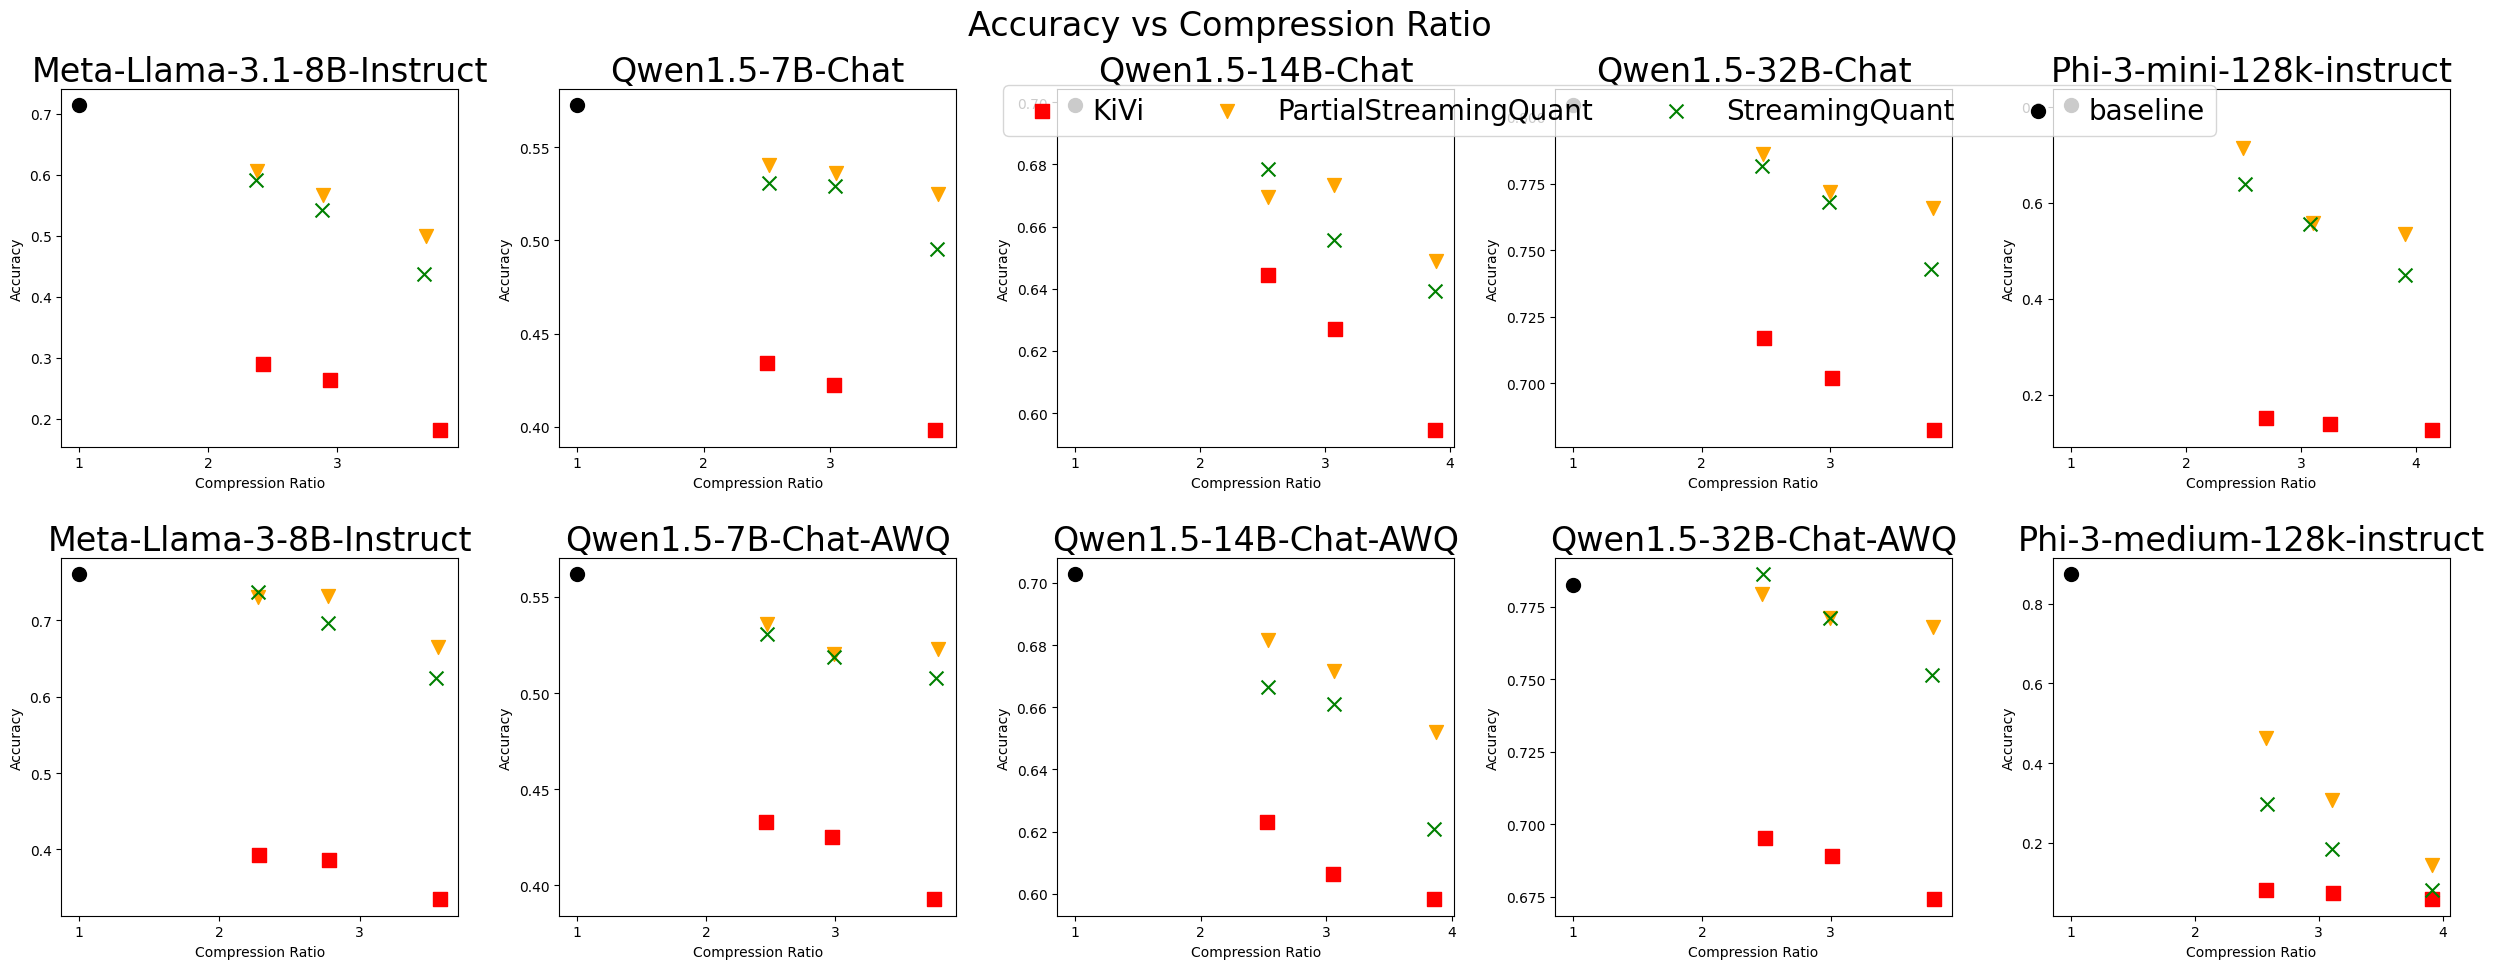

In [13]:
import numpy as np
import random

# Define a dictionary to map styles to subplots
style_mapping = {
    'baseline': {'color': 'black', 'marker': 'o'},
    'KiVi': {'color': 'red', 'marker': 's'},
    'StreamingQuant': {'color': 'green', 'marker': 'x'},
    'PartialStreamingQuant': {'color': 'orange', 'marker': 'v'},
    'LogQuant': {'color': 'blue', 'marker': 'D'},
    'PartialLogQuant': {'color': 'purple', 'marker': 'P'},
}

fig, axs = plt.subplots(2, 5, figsize=(25, 10))
#放大字体
plt.rcParams.update({'font.size': 20})
fig.suptitle('Accuracy vs Compression Ratio')

models = df_avg['model'].unique()
models.sort()
models = [
          'Meta-Llama-3.1-8B-Instruct', 'Meta-Llama-3-8B-Instruct',
          'Qwen1.5-7B-Chat', 'Qwen1.5-7B-Chat-AWQ',
       'Qwen1.5-14B-Chat', 'Qwen1.5-14B-Chat-AWQ', 
       'Qwen1.5-32B-Chat', 'Qwen1.5-32B-Chat-AWQ',
       'Phi-3-mini-128k-instruct', 'Phi-3-medium-128k-instruct',
       ]
for i, model in enumerate(models):
    df_model = df_avg[df_avg['model'] == model]
    df_model['method'] = df_model['method'].apply(lambda x: x.replace('_2_128', '').replace('_2_192', '').replace('_2_256', ''))
    ax = axs[i %2, (i//2) % 5]
    
    np.random.seed(0)
    random.seed(0)
    
    for method in df_model['method'].unique():
        if "Log" in method:
            continue
        method_data = df_model[df_model['method'] == method]
        style = style_mapping.get(method, {})
        
        ax.scatter(method_data['compression ratio'], method_data['accuracy'], 
                   color=style.get('color', 'black'), 
                   marker=style.get('marker', 'o'), 
                   s=100, 
                   label=method)
    
    ax.set_title(model)
    ax.set_xlabel('Compression Ratio')
    ax.set_ylabel('Accuracy')
    #ax.set_ylim(0, 0.8)

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.legend(loc='upper left', ncol=6, bbox_to_anchor=(-2.68, 2.36))
plt.savefig("results/accuracy_vs_compression_ratio_Streaming.png", dpi=600)
plt.show()

In [22]:
models = df_avg['model'].unique()
models.sort()
models = [
          'Meta-Llama-3.1-8B-Instruct', 'Meta-Llama-3-8B-Instruct',
          'Qwen1.5-7B-Chat', 'Qwen1.5-7B-Chat-AWQ',
       'Qwen1.5-14B-Chat', 'Qwen1.5-14B-Chat-AWQ', 
       'Qwen1.5-32B-Chat', 'Qwen2-7B-Instruct',
       'Phi-3-mini-128k-instruct', 'Phi-3-medium-128k-instruct',
       ]
for i, model in enumerate(models):
    df_model = df_avg[df_avg['model'] == model]
    df_model['method'] = df_model['method'].apply(lambda x: x.replace('_2_128', '').replace('_2_192', '').replace('_2_256', ''))
    ax = axs[i %2, (i//2) % 5]
    df_model["accuracy"] = df_model["accuracy"].apply(lambda x: x * 100)
    s = ''
    for method in ['baseline', 'KiVi', 'LogQuant', 'PartialLogQuant']:
        method_data = df_model[df_model['method'] == method]
        if method != 'baseline':
            method_data = method_data[method_data['compression ratio'] > 3.5]
        s += f'& {method_data["accuracy"].mean():.2f} '
    print(f'{model}: {s}')
        

Meta-Llama-3.1-8B-Instruct: & 71.42 & 18.04 & 40.41 & 50.64 
Meta-Llama-3-8B-Instruct: & 76.04 & 33.43 & 63.68 & 69.29 
Qwen1.5-7B-Chat: & 57.24 & 39.80 & 49.66 & 52.08 
Qwen1.5-7B-Chat-AWQ: & 56.18 & 39.27 & 49.28 & 50.57 
Qwen1.5-14B-Chat: & 69.90 & 59.44 & 62.02 & 64.90 
Qwen1.5-14B-Chat-AWQ: & 70.28 & 59.82 & 63.31 & 65.50 
Qwen1.5-32B-Chat: & 80.44 & 68.23 & 75.97 & 76.50 
Qwen2-7B-Instruct: & 52.99 & 3.71 & 34.34 & 36.47 
Phi-3-mini-128k-instruct: & 80.29 & 12.59 & 51.86 & 52.39 
Phi-3-medium-128k-instruct: & 87.34 & 5.84 & 22.44 & 37.00 


/tmp/ipykernel_149747/2589075095.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model['method'] = df_model['method'].apply(lambda x: x.replace('_2_128', '').replace('_2_192', '').replace('_2_256', ''))
/tmp/ipykernel_149747/2589075095.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model["accuracy"] = df_model["accuracy"].apply(lambda x: x * 100)
/tmp/ipykernel_149747/2589075095.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc

/tmp/ipykernel_149747/3301224479.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model['method'] = df_model['method'].apply(lambda x: x.replace('_2_128', '').replace('_2_192', '').replace('_2_256', ''))
/tmp/ipykernel_149747/3301224479.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model["accuracy"] = df_model["accuracy"].apply(lambda x: x * 100)
/tmp/ipykernel_149747/3301224479.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc

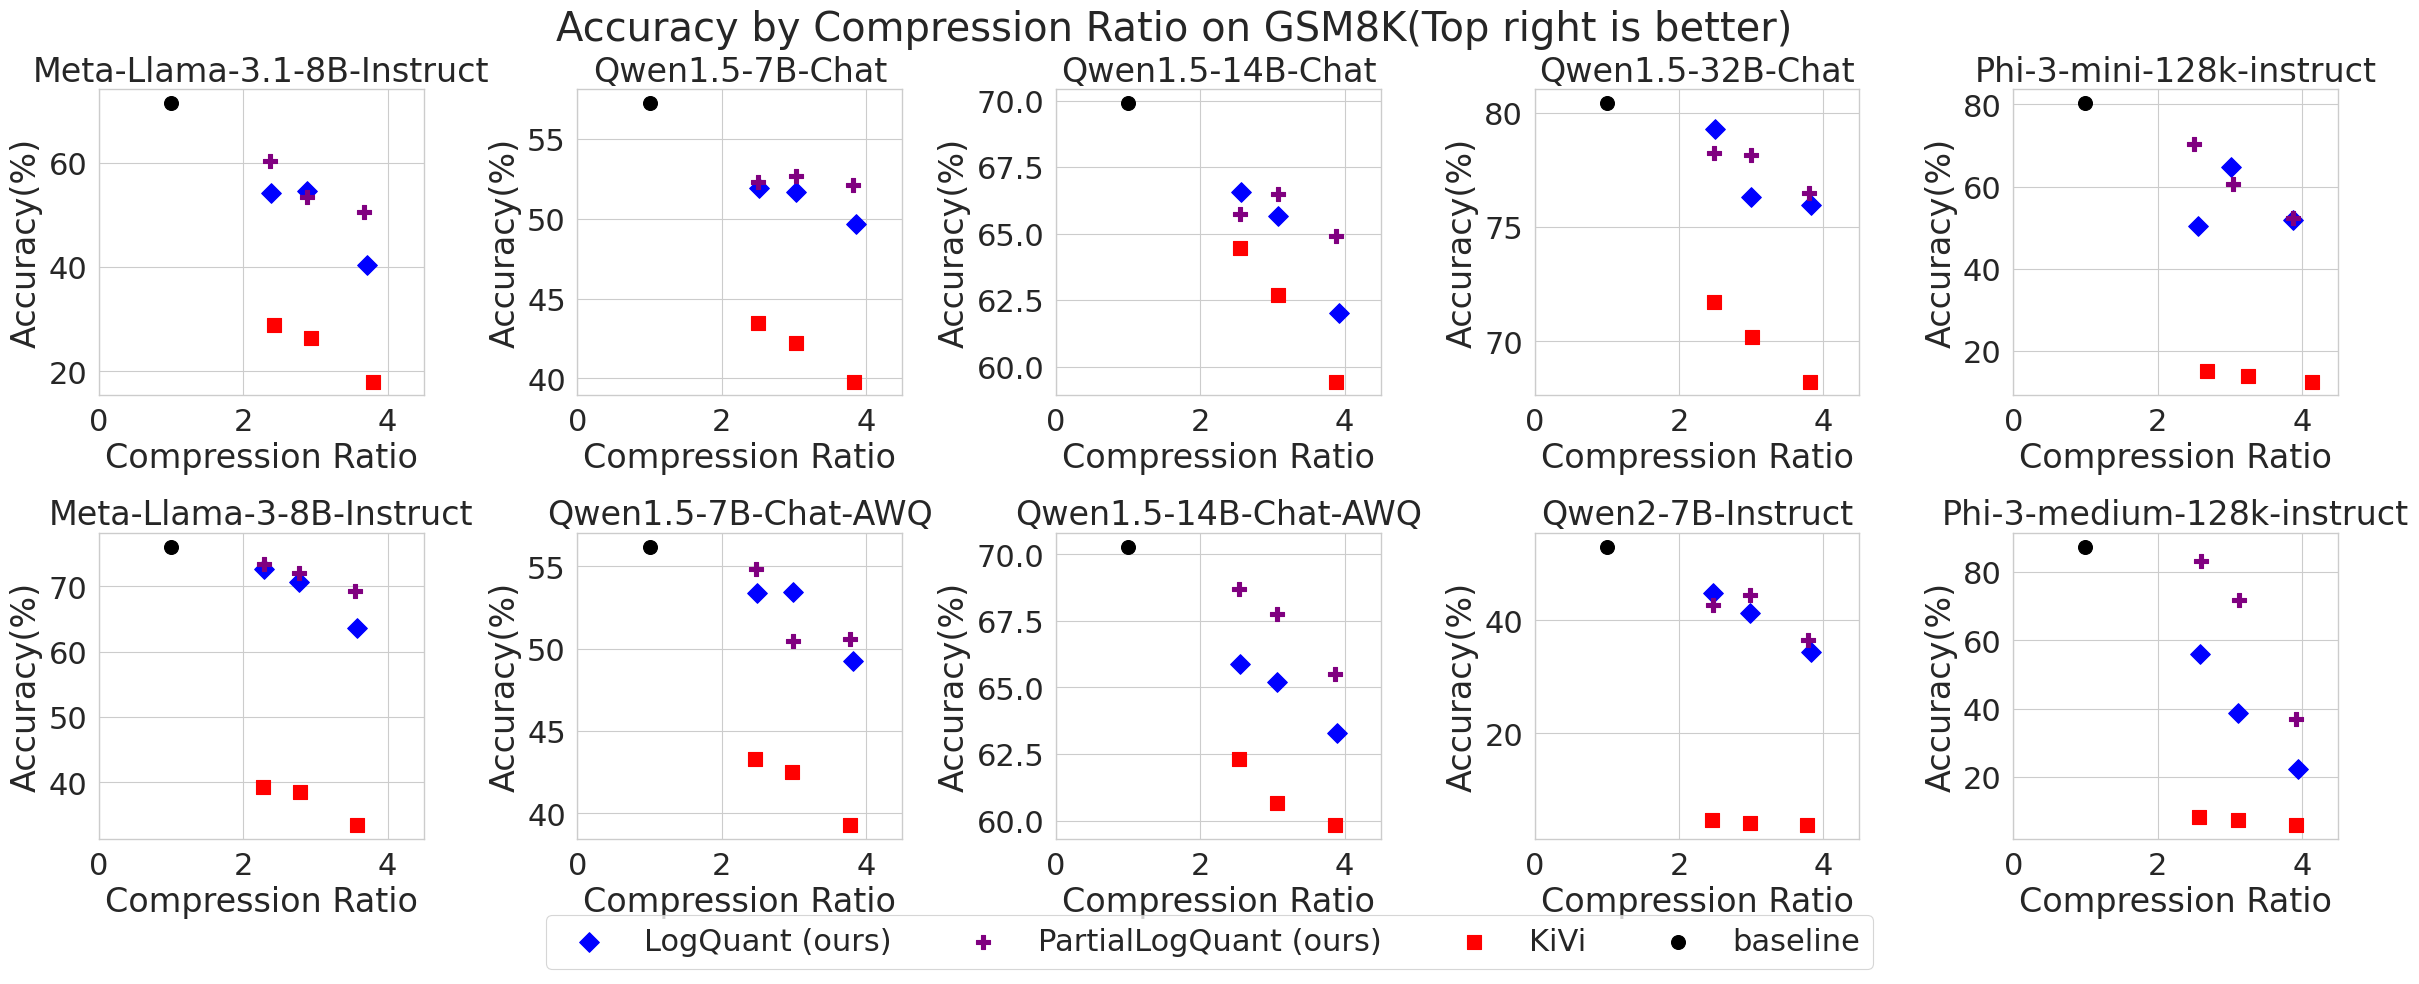

In [26]:
import numpy as np
import random
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=2.5)
# Define a dictionary to map styles to subplots
style_mapping = {
    'baseline': {'color': 'black', 'marker': 'o'},
    'KiVi': {'color': 'red', 'marker': 's'},
    'StreamingQuant': {'color': 'green', 'marker': 'x'},
    'PartialStreamingQuant': {'color': 'orange', 'marker': 'v'},
    'LogQuant': {'color': 'blue', 'marker': 'D'},
    'PartialLogQuant': {'color': 'purple', 'marker': 'P'},
}

fig, axs = plt.subplots(2, 5, figsize=(24, 10))

models = df_avg['model'].unique()
models.sort()
models = [
          'Meta-Llama-3.1-8B-Instruct', 'Meta-Llama-3-8B-Instruct',
          'Qwen1.5-7B-Chat', 'Qwen1.5-7B-Chat-AWQ',
       'Qwen1.5-14B-Chat', 'Qwen1.5-14B-Chat-AWQ', 
       'Qwen1.5-32B-Chat', 'Qwen2-7B-Instruct',
       'Phi-3-mini-128k-instruct', 'Phi-3-medium-128k-instruct',
       ]
for i, model in enumerate(models):
    df_model = df_avg[df_avg['model'] == model]
    df_model['method'] = df_model['method'].apply(lambda x: x.replace('_2_128', '').replace('_2_192', '').replace('_2_256', ''))
    ax = axs[i %2, (i//2) % 5]
    df_model["accuracy"] = df_model["accuracy"].apply(lambda x: x * 100)
    
    np.random.seed(0)
    random.seed(0)
    
    for method in df_model['method'].unique():
        if "Stream" in method:
            continue
        method_data = df_model[df_model['method'] == method]
        style = style_mapping.get(method, {})
        
        ax.scatter(method_data['compression ratio'], method_data['accuracy'], 
                   color=style.get('color', 'black'), 
                   marker=style.get('marker', 'o'), 
                   s=100, 
                   label=method)
    
    ax.set_title(model)
    ax.set_xlabel('Compression Ratio')
    ax.set_ylabel('Accuracy(%)')
    ax.set_xlim(0, 4.5)
    #ax.set_ylim(0, 0.8)

plt.tight_layout()
plt.subplots_adjust(top=0.9, bottom=0.15)
lines, labels = fig.axes[-1].get_legend_handles_labels()
#if Log in labels, add (ours) to the end of the label
for i in range(len(labels)):
    if "Log" in labels[i]:
        labels[i] += " (ours)"
fig.legend(lines, labels, loc="lower center", ncol=4)
fig.suptitle('Accuracy by Compression Ratio on GSM8K(Top right is better)')
plt.savefig("results/accuracy_vs_compression_ratio_Log.pdf", dpi=600)
plt.show()

/tmp/ipykernel_57660/3208914805.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model['method'] = df_model['method'].apply(lambda x: x.replace('_2_128', '').replace('_2_192', '').replace('_2_256', ''))
/tmp/ipykernel_57660/3208914805.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model['method'] = df_model['method'].apply(lambda x: x.replace('_2_128', '').replace('_2_192', '').replace('_2_256', ''))
/tmp/ipykernel_57660/3208914805.py:22: SettingWithCopyWarning: 
A value is trying to be set 

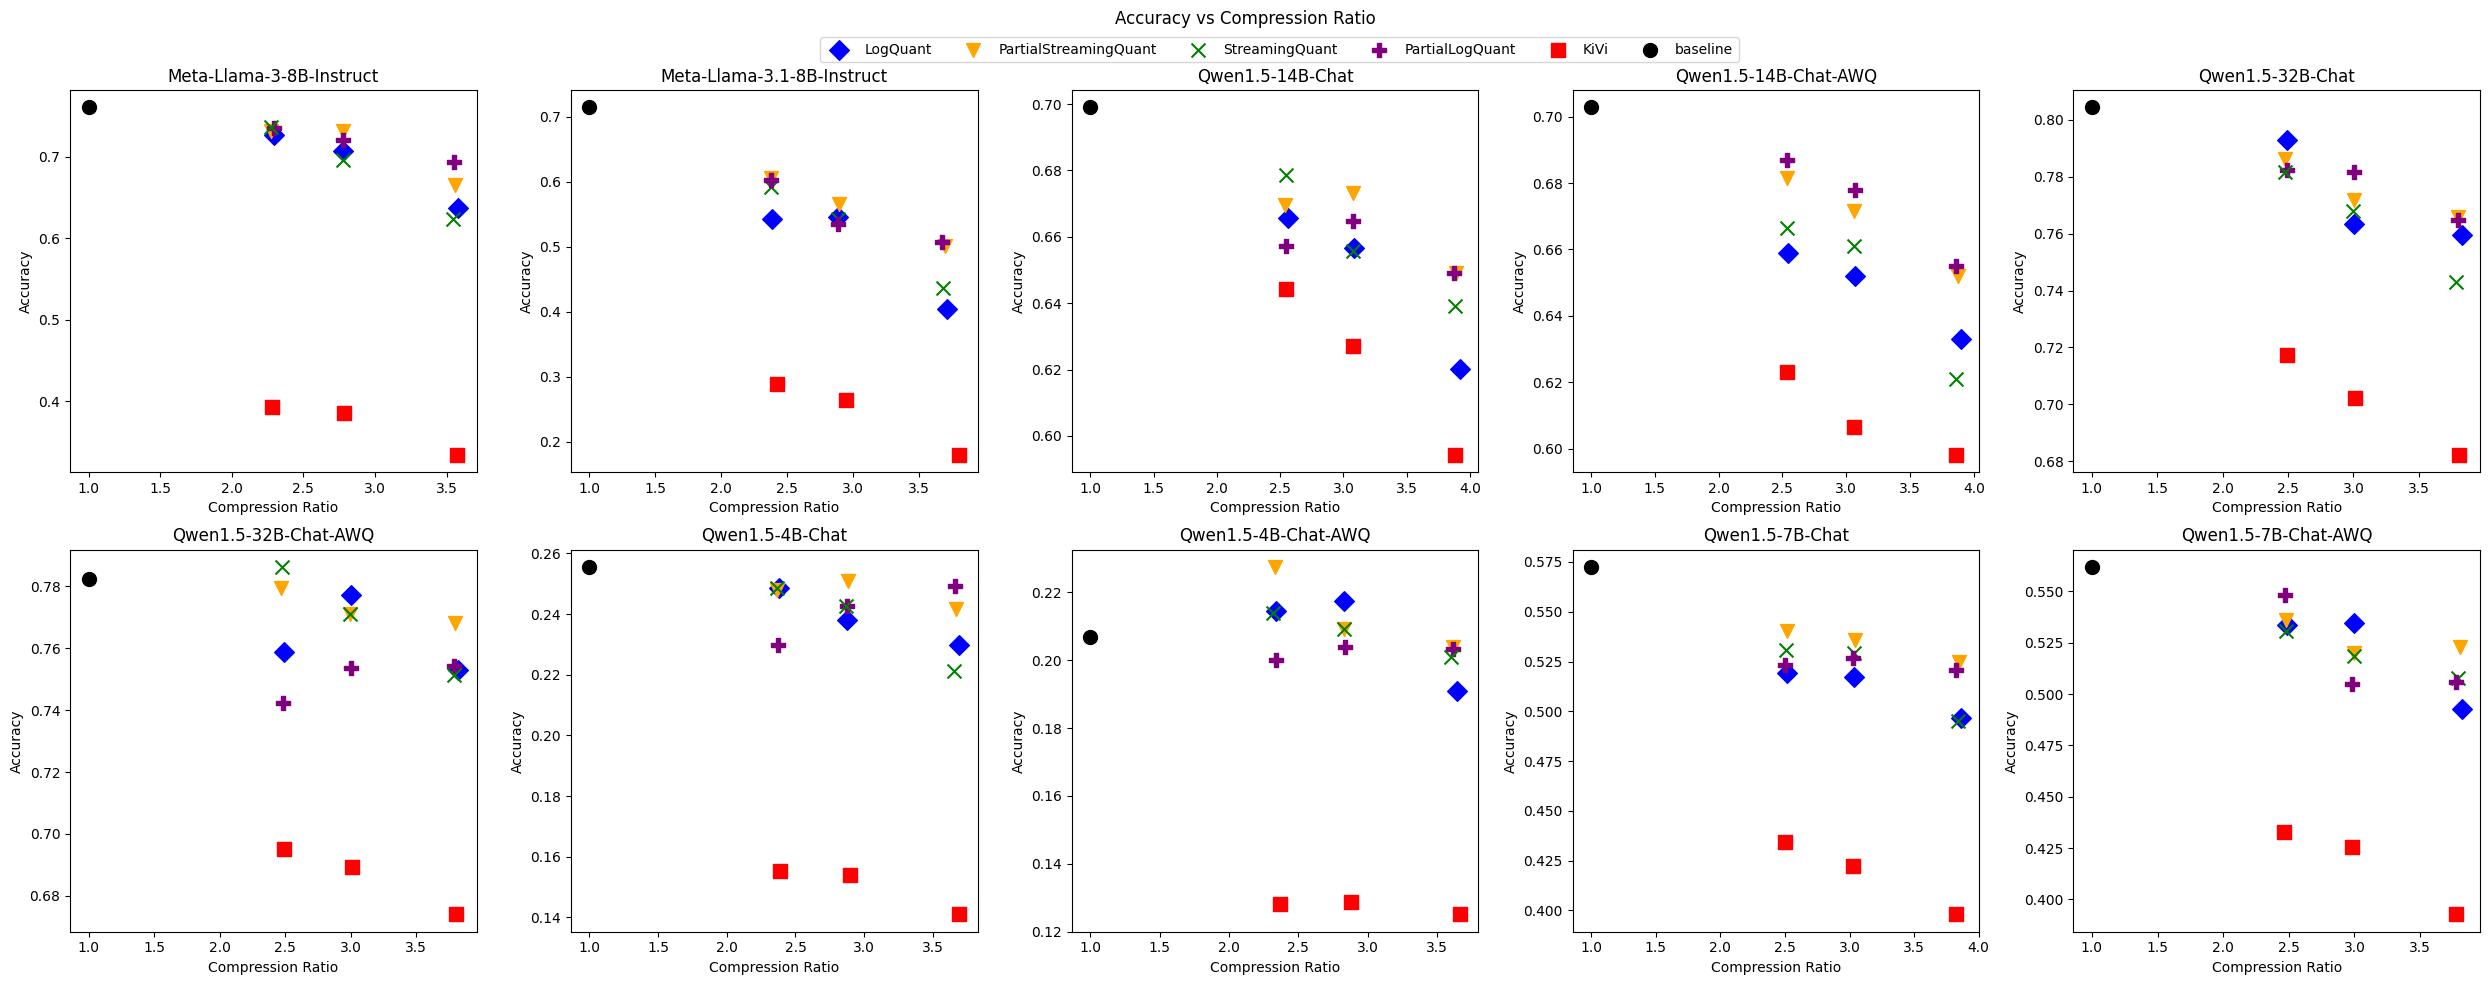

In [41]:
import numpy as np
import random

# Define a dictionary to map styles to subplots
style_mapping = {
    'baseline': {'color': 'black', 'marker': 'o'},
    'KiVi': {'color': 'red', 'marker': 's'},
    'StreamingQuant': {'color': 'green', 'marker': 'x'},
    'PartialStreamingQuant': {'color': 'orange', 'marker': 'v'},
    'LogQuant': {'color': 'blue', 'marker': 'D'},
    'PartialLogQuant': {'color': 'purple', 'marker': 'P'},
}

fig, axs = plt.subplots(2, 5, figsize=(25, 10))
fig.suptitle('Accuracy vs Compression Ratio')

models = df_avg['model'].unique()
models.sort()
models = [model for model in models if '1.8B' not in model]
for i, model in enumerate(models):
    df_model = df_avg[df_avg['model'] == model]
    df_model['method'] = df_model['method'].apply(lambda x: x.replace('_2_128', '').replace('_2_192', '').replace('_2_256', ''))
    ax = axs[i // 5, i % 5]
    
    np.random.seed(0)
    random.seed(0)
    
    for method in df_model['method'].unique():
        method_data = df_model[df_model['method'] == method]
        style = style_mapping.get(method, {})
        
        ax.scatter(method_data['compression ratio'], method_data['accuracy'], 
                   color=style.get('color', 'black'), 
                   marker=style.get('marker', 'o'), 
                   s=100, 
                   label=method)
    
    ax.set_title(model)
    ax.set_xlabel('Compression Ratio')
    ax.set_ylabel('Accuracy')
    #ax.set_ylim(0, 0.8)

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.legend(loc='upper left', ncol=6, bbox_to_anchor=(-3.1, 2.36))
plt.savefig("results/accuracy_vs_compression_ratio.png", dpi=600)
plt.show()